# Chapter 1. Introduction

# - Irises KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mglearn
from sklearn.datasets import load_iris

## Meeting Dataset

In [3]:
#Loading Dataset
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#Show keys
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#Show values of given key
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
#Show type of data key
print(type(iris_dataset['data']))

<class 'numpy.ndarray'>


In [7]:
#Show shape of dataset
print(iris_dataset['data'].shape)

(150, 4)


In [8]:
#Show first 5 samples of data key
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Preparing Data

#### Training and test data

In [9]:
from sklearn.model_selection import train_test_split

#Split given sets to 2 parts - train and test
#Random state is a random seed
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


#### Data Visualisation

In [10]:
#creating pandas dataframe with given values as data...
#...and given values as column names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


/home/akado/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


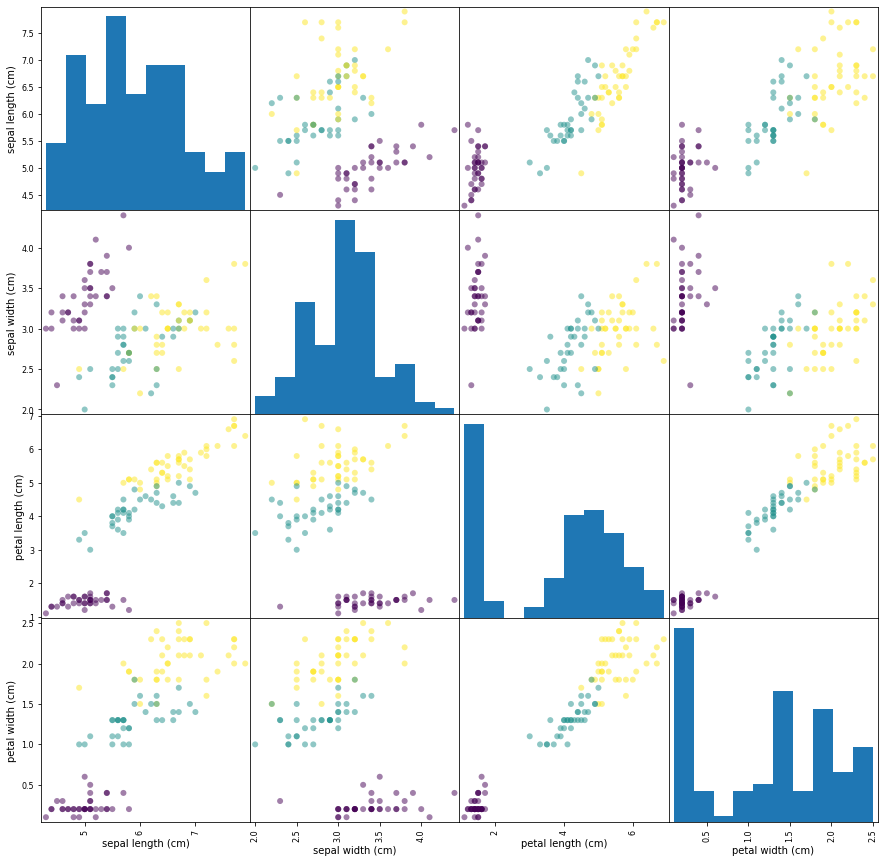

In [11]:
#creating pandas scatter matrix
import pandas.plotting as pdp
grr = pdp.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o')

## Model implementation (knn classifier)

#### model initialization

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#creating an object of model class
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
#model building
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### model validation (prognostication on test data)

In [21]:
#Checking the accuracy by taking a mean value out of...
#...comparing gain predicts with known ones
#prognostication for test data
y_pred = knn.predict(X_test)

In [22]:
#compare
np.mean(y_pred == y_test)

0.9736842105263158

In [16]:
#Checking the accuracy by 'score' method
knn.score(X_test, y_test)

0.9736842105263158

#### model apply (prognostication on new data)

In [17]:
#a task sample. SHOULD BE 2-DIMENSION
X_new = np.array([[5, 2.9, 1, 0.2]])

In [18]:
#prognostication by 'predict' method
prediction = knn.predict(X_new)
print('prediction: {}'.format(prediction),'- {}'.format(iris_dataset['target_names'][prediction]))

prediction: [0] - ['setosa']


/home/akado/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


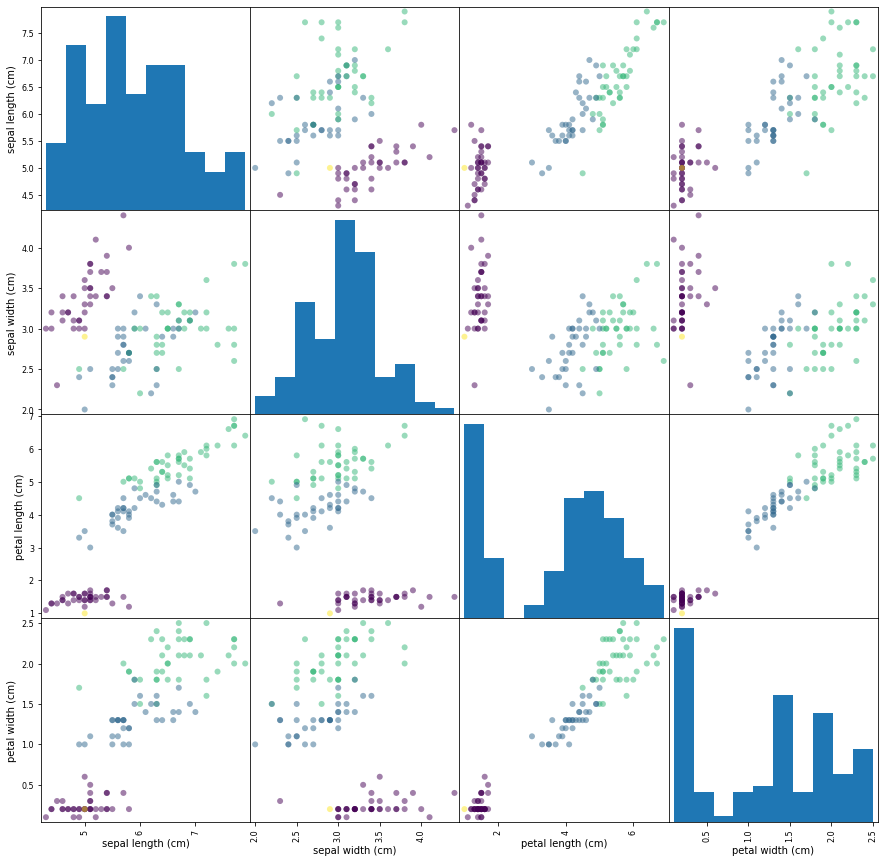

In [19]:
####Visualize prediction on scatter matrix
#merging gain sample data with datasets
X_concat = np.concatenate([X_train, X_new])
y_new = [3]
y_concat = np.concatenate([y_train, y_new])

iris_dataframe2 = pd.DataFrame(X_concat, columns=iris_dataset.feature_names)

#creating pandas scatter matrix
import pandas.plotting as pdp
grr2 = pdp.scatter_matrix(iris_dataframe2, c=y_concat, figsize=(15,15), marker='o')

## Conclusion
#### A short form of algorythm

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158